In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Grid:
xmin, xmax = 0,1
N = 1000
dx = (xmax-xmin)/N
x= np.linspace(xmin,xmax,N)

In [3]:
#CFL condition:
CFL = 0.9
v = 1.0
T = 1.0
dt = CFL * dx / v
nt = int(np.ceil(T/dt))
dt = T/ nt
CFL = dt * v / dx
alpha = v * dt / dx

In [4]:
#Initial Condition:
x0 = 0.5
sigma = 0.1
def f(x): 
    return np.exp(-(x - x0)**2 / sigma**2)

u = f(x)

In [5]:
#Analytic solution:
def analytic(x, t):
    arg1 = (x - v*t) % xmax
    arg2 = (x + v*t) % xmax
    return 0.5*(f(arg1) + f(arg2))

In [6]:
r = np.zeros_like(u)
s = np.zeros_like(u)
for j in range(0,N-1):
    r[j] = v * (u[j+1]-u[j]) / dx
    s[j] = (u[j+1]-u[j]) / dt
r[N-1] = r[N-2]
s[N-1] = s[N-2]

In [7]:
#FTCS:
for n in range(nt):
    r_new = np.zeros_like(r)
    s_new = np.zeros_like(s)
    u_new = np.zeros_like(u)

    for j in range(1,N-1):
        r_new[j] = r[j] + 0.5*alpha*(s[j+1]-s[j-1])
        s_new[j] = s[j] + 0.5*alpha*(r[j+1]-r[j-1])
        u_new[j] = u[j] + 0.5* dt* (s_new[j]+s[j])
    
    r_new[0] = r_new[N-2]
    r_new[N-1] = r_new[1] 
    s_new[0] = s_new[N-2]
    s_new[N-1] = s_new[1] 
    u_new[0] = u_new[N-2]
    u_new[N-1] = u_new[1]
    r = r_new 
    s = s_new 
    u = u_new  

In [8]:
u_ftcs = u
u_exact = analytic(x,T)

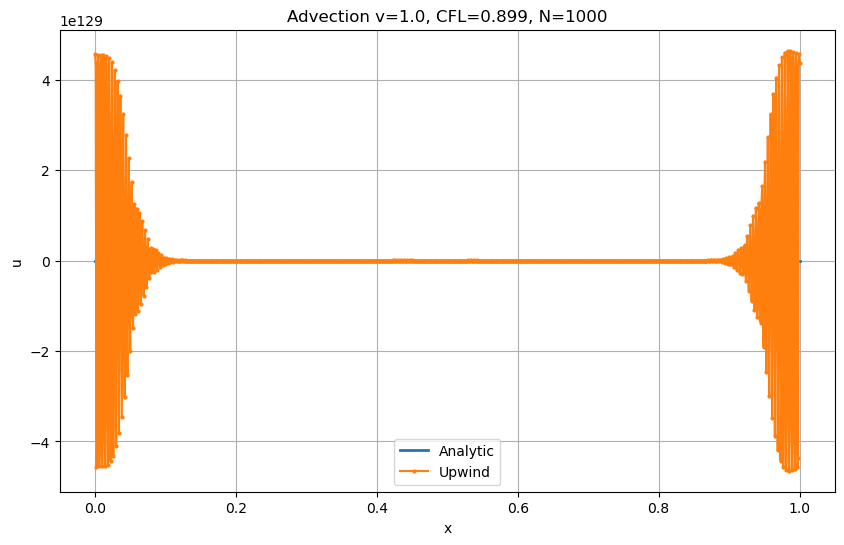

In [11]:
# ---------- plots ----------
plt.figure(figsize=(10,6))
plt.plot(x, u_exact, label='Analytic', linewidth=2)
plt.plot(x, u_ftcs, '.-', label='Upwind', markersize=4)
plt.legend()
plt.title(f"Advection v={v}, CFL={CFL:.3f}, N={N}")
plt.xlabel("x")
plt.ylabel("u")
plt.grid(True)
plt.show()

In [7]:
#Lax-Friedrichs:
for n in range(nt):
    r_new = np.zeros_like(r)
    s_new = np.zeros_like(s)
    u_new = np.zeros_like(u)

    for j in range(1,N-1):
        r_new[j] = 0.5*(r[j+1]+r[j-1]) + 0.5*alpha*(s[j+1]-s[j-1])
        s_new[j] = 0.5*(s[j+1]+s[j-1]) + 0.5*alpha*(r[j+1]-r[j-1])
        u_new[j] = u[j] + 0.5 * dt * (s_new[j]+s[j])
    
    r_new[0] = r_new[N-2]
    r_new[N-1] = r_new[1] 
    s_new[0] = s_new[N-2]
    s_new[N-1] = s_new[1] 
    u_new[0] = u_new[N-2]
    u_new[N-1] = u_new[1]
    r = r_new 
    s = s_new 
    u = u_new  

In [8]:
u_lf = u
u_exact = analytic(x,T)

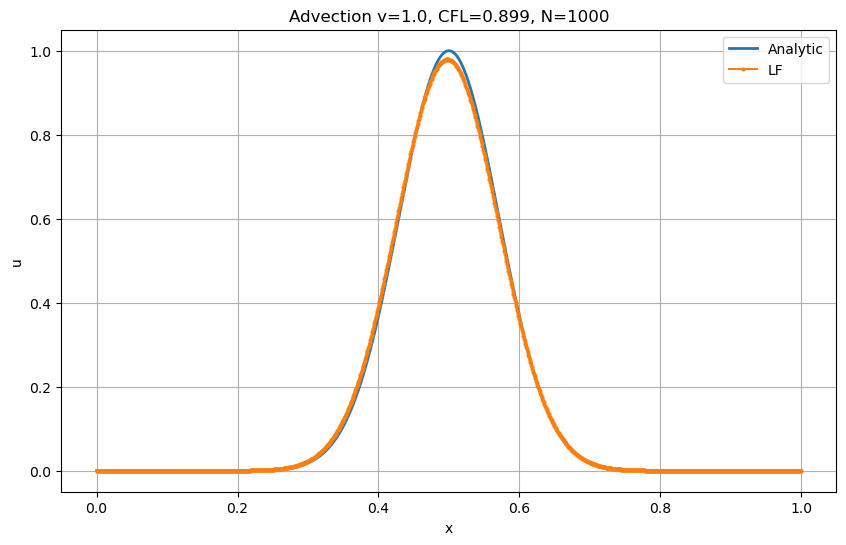

In [9]:
# ---------- plots ----------
plt.figure(figsize=(10,6))
plt.plot(x, u_exact, label='Analytic', linewidth=2)
plt.plot(x, u_lf, '.-', label='LF', markersize=4)
plt.legend()
plt.title(f"Advection v={v}, CFL={CFL:.3f}, N={N}")
plt.xlabel("x")
plt.ylabel("u")
plt.grid(True)
plt.show()

In [10]:
del u

In [11]:
#Initial Condition:
x0 = 0.5
sigma = 0.1
def f(x): 
    return np.exp(-(x - x0)**2 / sigma**2)

u = f(x)
r = np.zeros_like(u)
s = np.zeros_like(u)
for j in range(0,N-1):
    r[j] = v * (u[j+1]-u[j]) / dx
    s[j] = (u[j+1]-u[j]) / dt
r[N-1] = r[N-2]
s[N-1] = s[N-2]

In [12]:
#Lax-Wendolf:
for n in range(nt):
    r_new = np.zeros_like(r)
    s_new = np.zeros_like(s)
    u_new = np.zeros_like(u)

    for j in range(1,N-1):
        r_new[j] = r[j] + alpha*(0.5*(s[j+1]-s[j-1])+0.5*alpha*(r[j+1]-2*r[j]+r[j-1]))
        s_new[j] = s[j] + alpha*(0.5*(r[j+1]-r[j-1])+0.5*alpha*(s[j+1]-2*s[j]+s[j-1]))
        u_new[j] = u[j] + 0.5 * dt * (s_new[j]+s[j])
    
    r_new[0] = r_new[N-2]
    r_new[N-1] = r_new[1] 
    s_new[0] = s_new[N-2]
    s_new[N-1] = s_new[1] 
    u_new[0] = u_new[N-2]
    u_new[N-1] = u_new[1]
    r = r_new 
    s = s_new 
    u = u_new  

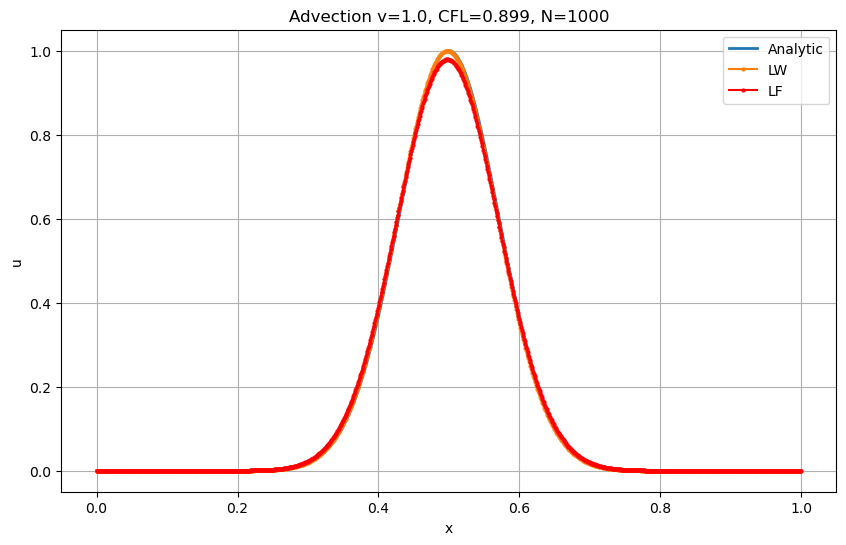

In [13]:
u_lw = u
# ---------- plots ----------
plt.figure(figsize=(10,6))
plt.plot(x, u_exact, label='Analytic', linewidth=2)
plt.plot(x, u_lw, '.-', label='LW', markersize=4)
plt.plot(x, u_lf, '.-',color='red', label='LF', markersize=4)
plt.legend()
plt.title(f"Advection v={v}, CFL={CFL:.3f}, N={N}")
plt.xlabel("x")
plt.ylabel("u")
plt.grid(True)
plt.show()